<a href="https://colab.research.google.com/github/jsroa15/Deep_Learning/blob/main/Intro_to_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

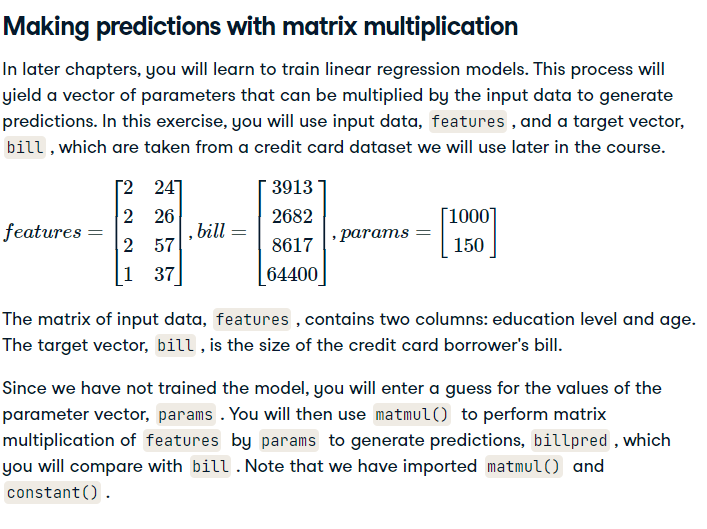

In [ ]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

In [ ]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy())) 

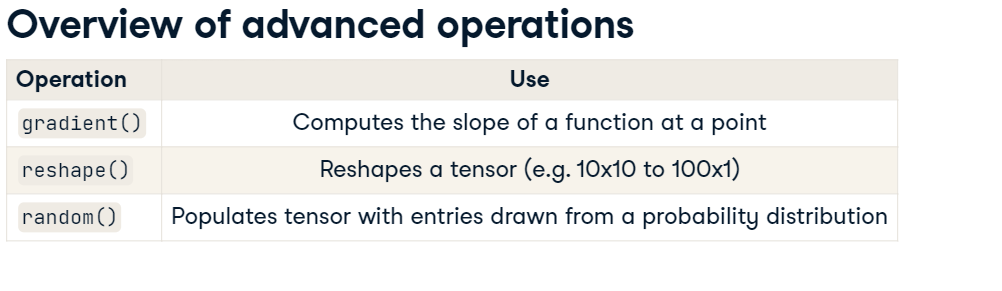

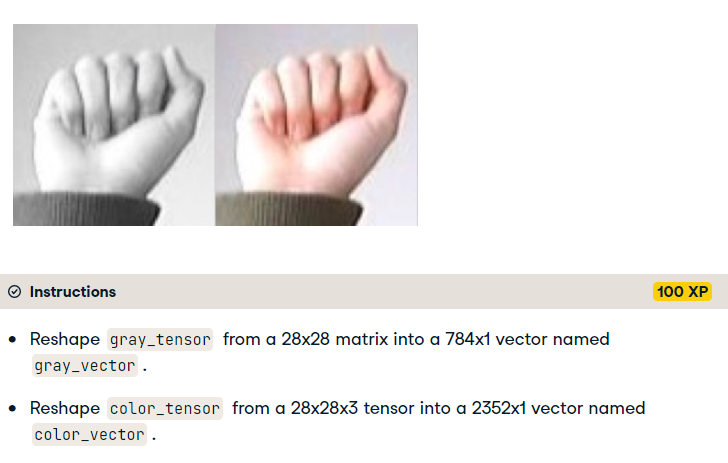

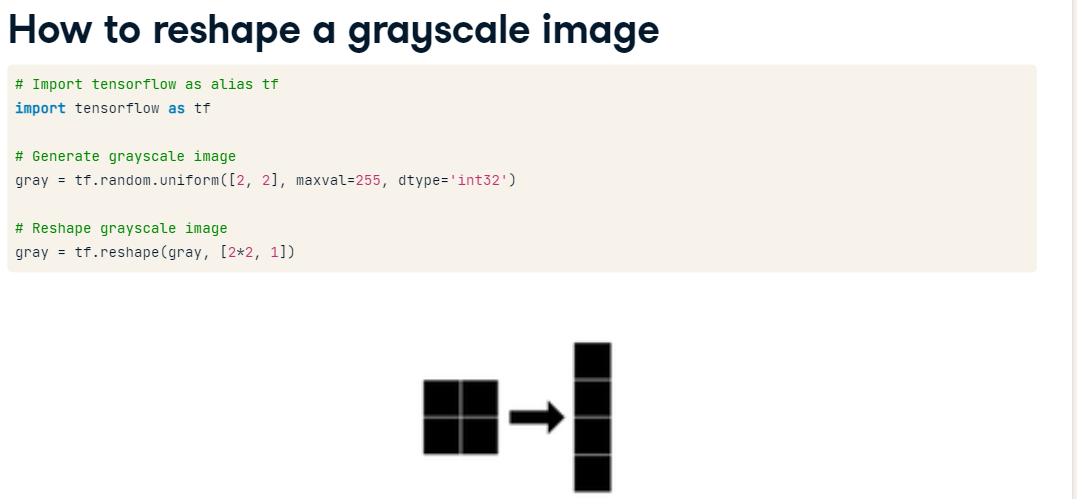

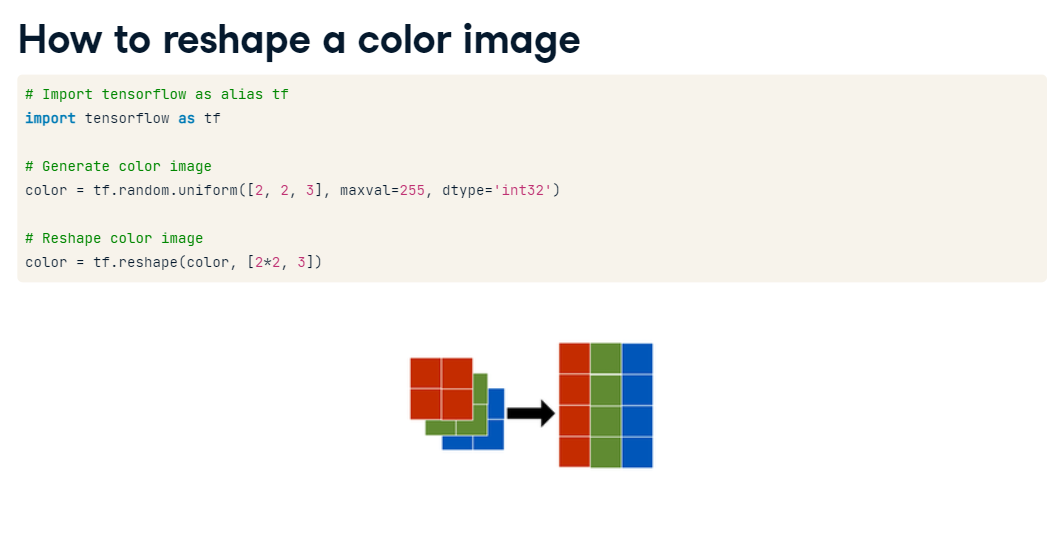

In [ ]:
# Reshape the grayscale image tensor into a vector
gray_vector = reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = reshape(color_tensor, (2352, 1))

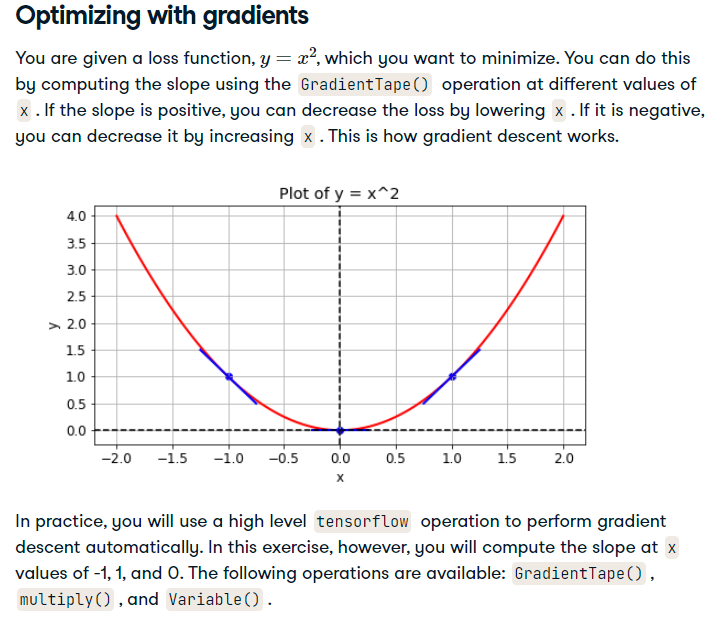

In [ ]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = multiply(x,x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

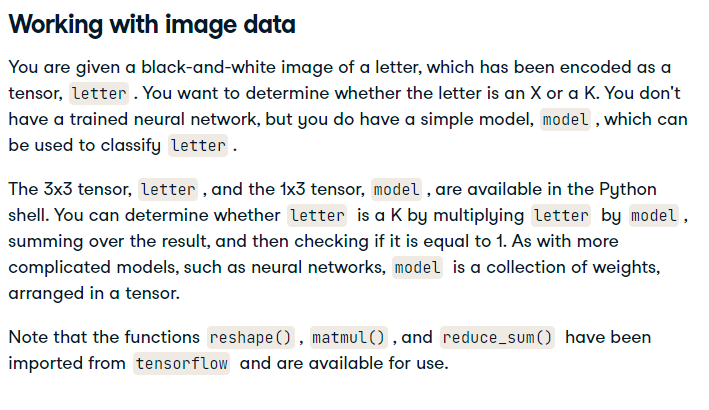

In [ ]:
# Reshape model from a 1x3 to a 3x1 tensor
model = reshape(model, (3, 1))

# Multiply letter by model
output = matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = sum(output)
print(prediction.numpy())

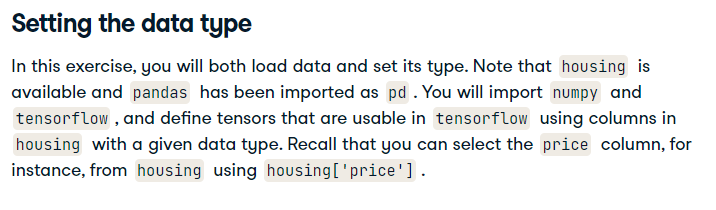

In [ ]:
# Import numpy and tensorflow with their standard aliases
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

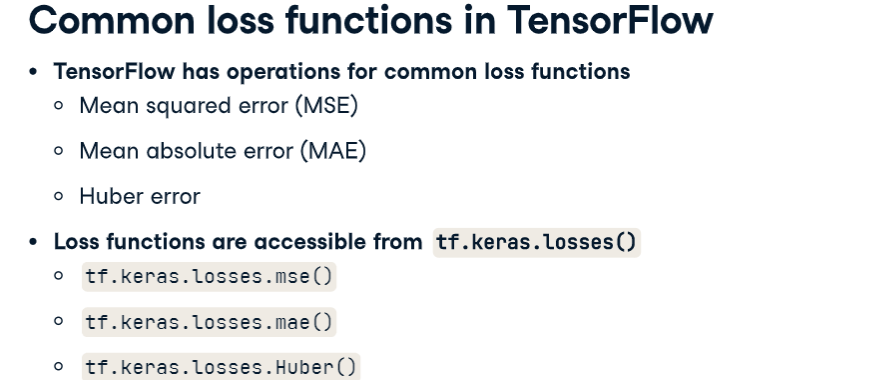

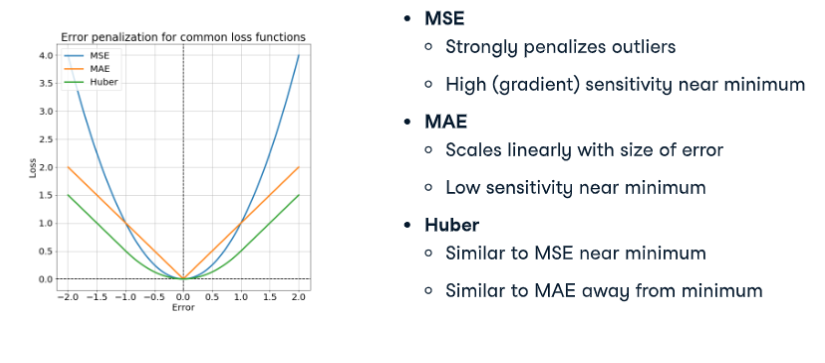

In [ ]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept+slope*features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets,predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

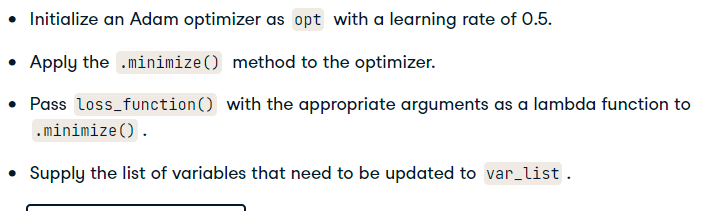

In [ ]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(1000):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

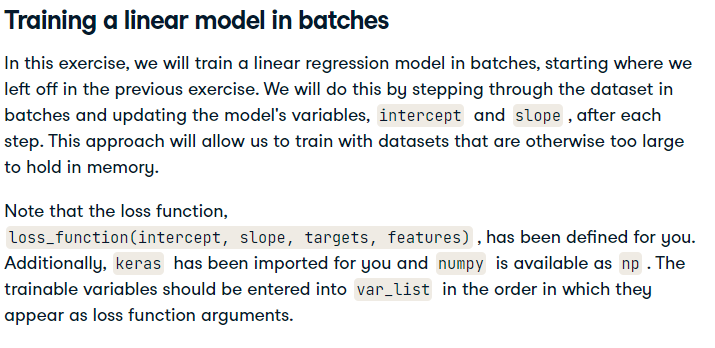

In [ ]:
# Define the intercept and slope
intercept = Variable(10.0, float32)
slope = Variable(0.5, float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)







# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

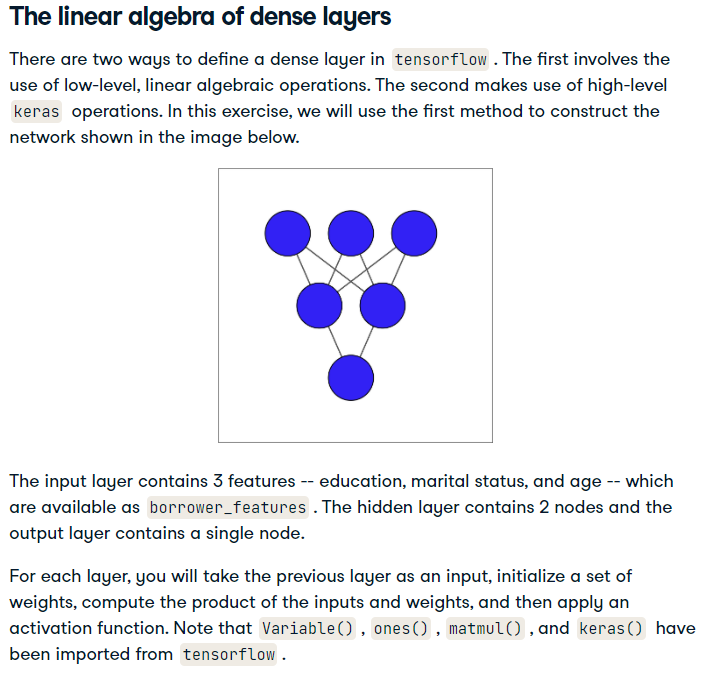

In [ ]:
# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(ones((3,2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = matmul(borrower_features,weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(bias1 + product1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')

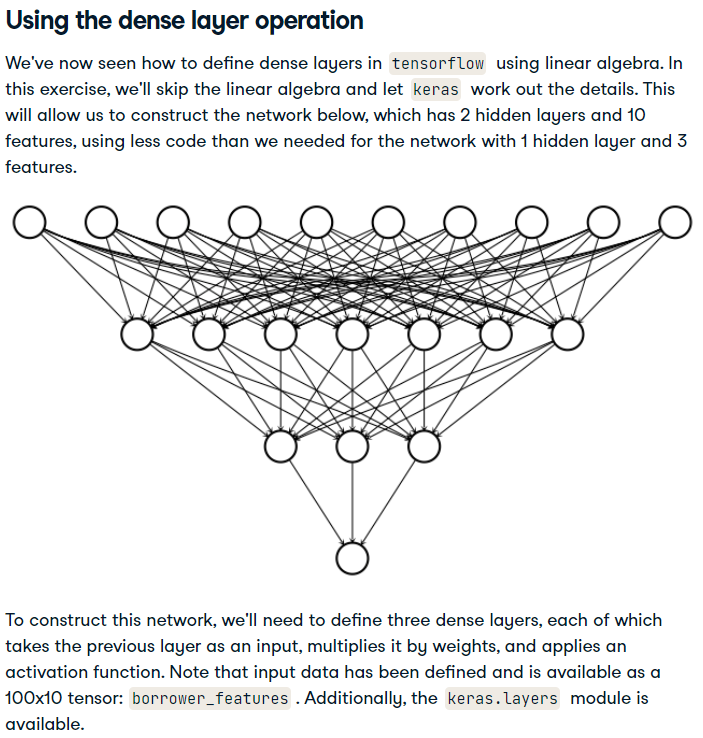

In [ ]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3,activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1,activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)

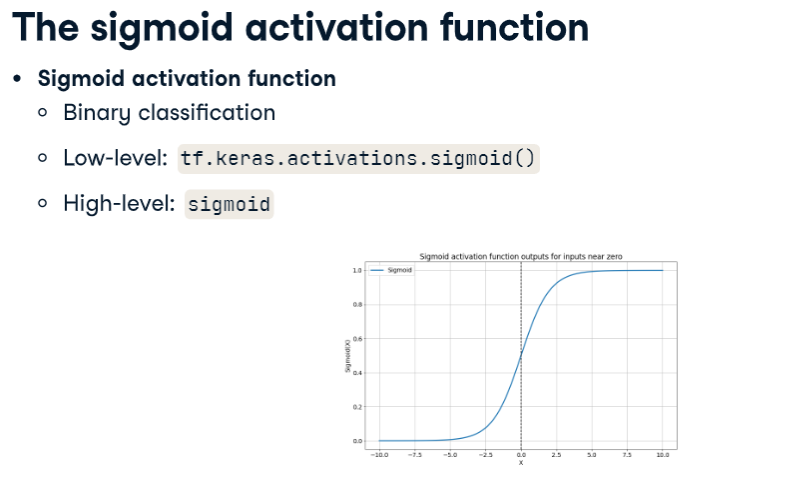

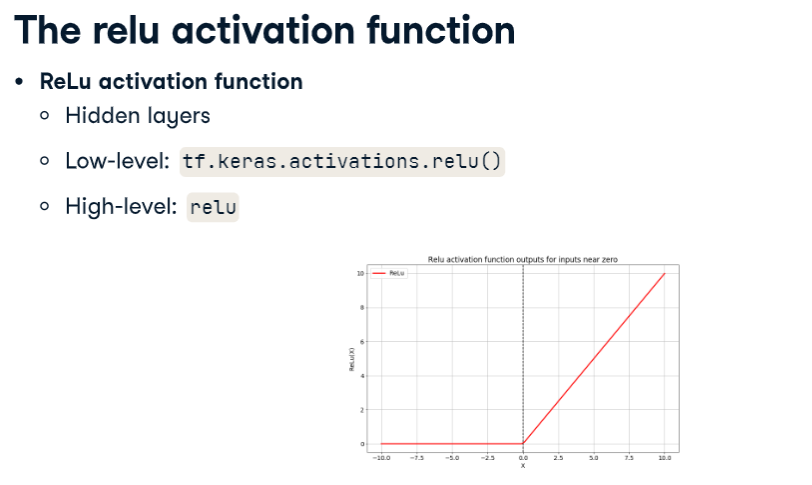

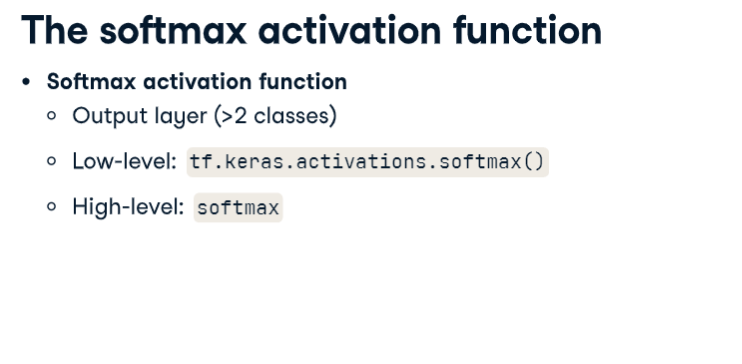

In [ ]:
#############Binary Classificaton#################

# Construct input layer from features
inputs = constant(bill_amounts,float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

In [ ]:
###########  Multiclass classification problems  ###############

# Construct input layer from borrower features
inputs = constant(borrower_features,float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

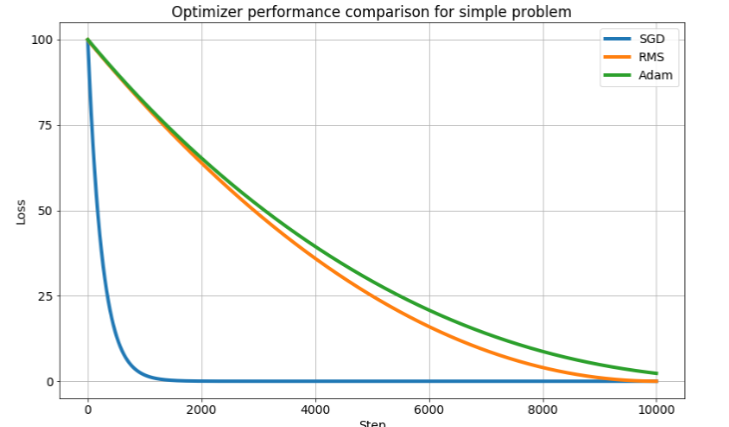

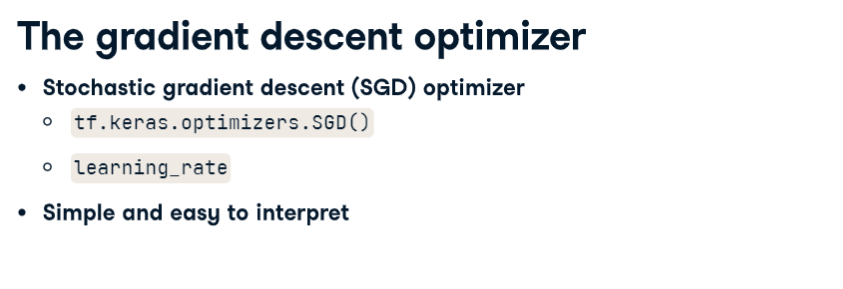


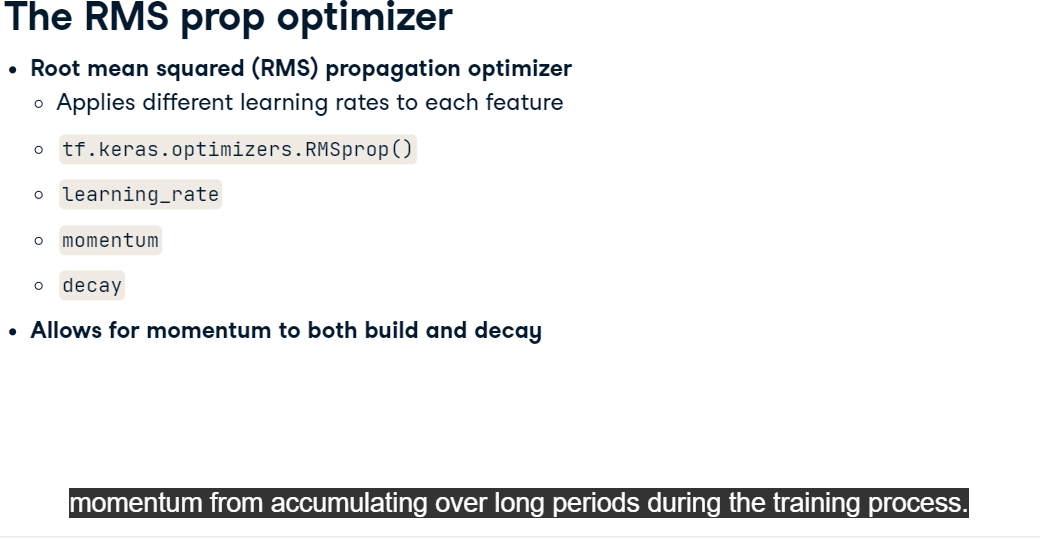

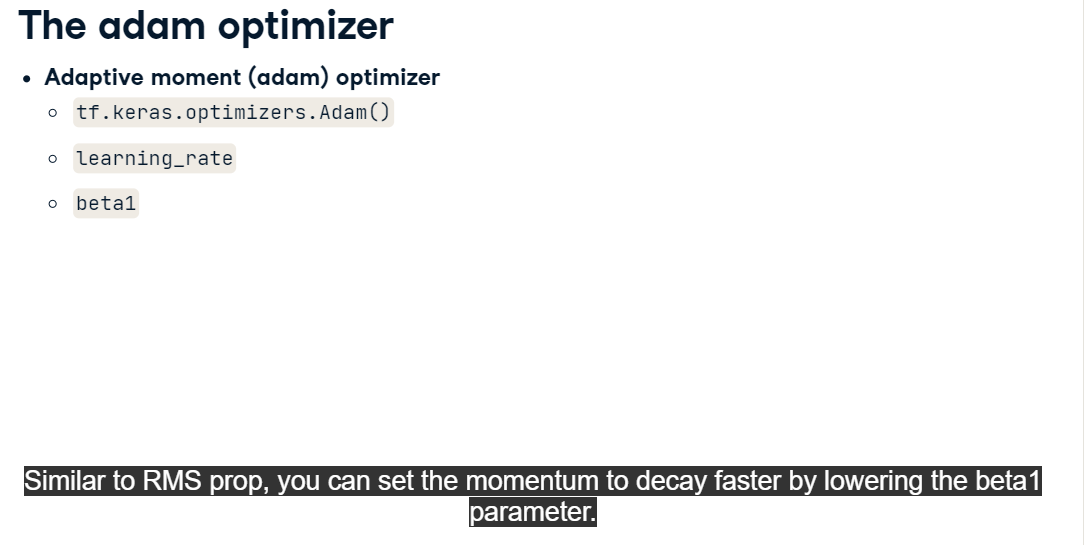



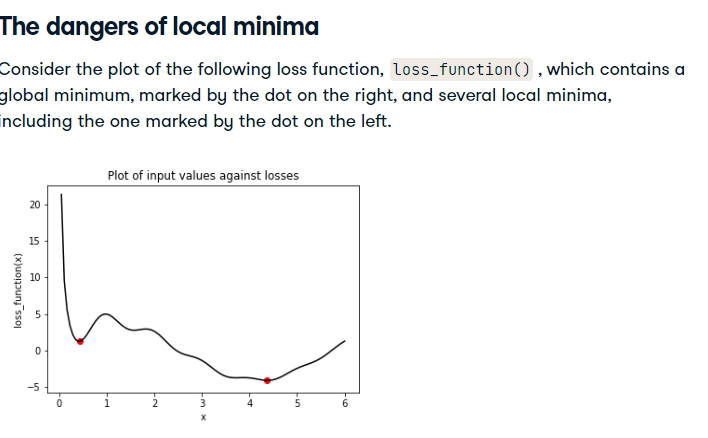

In [ ]:
# Initialize x_1 and x_2
x_1 = Variable(6.0,float32)
x_2 = Variable(0.3,float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())


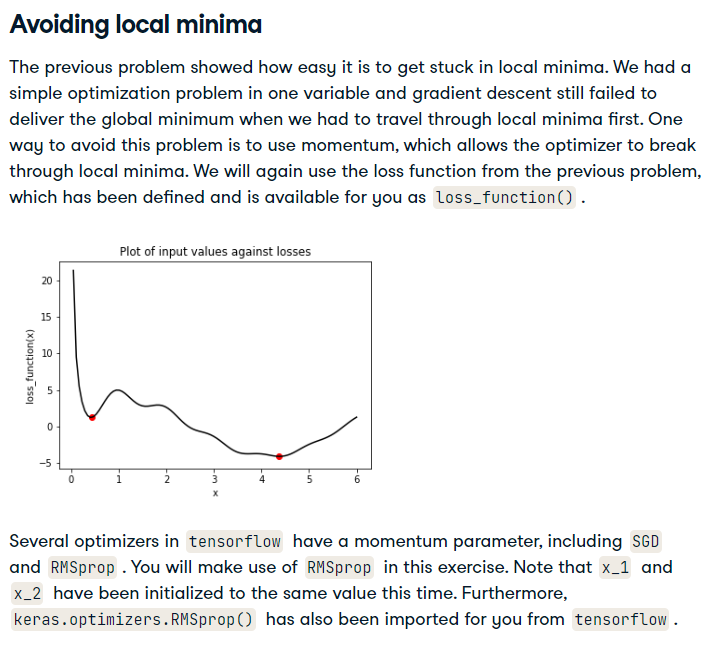

In [ ]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

# Initializting Neural Networks

In [ ]:
# Define the layer 1 weights
w1 = Variable(random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(ones([7]))

# Define the layer 2 weights
w2 = Variable(random.normal([7, 1]))

# Define the layer 2 bias
b2 = Variable(0)


# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

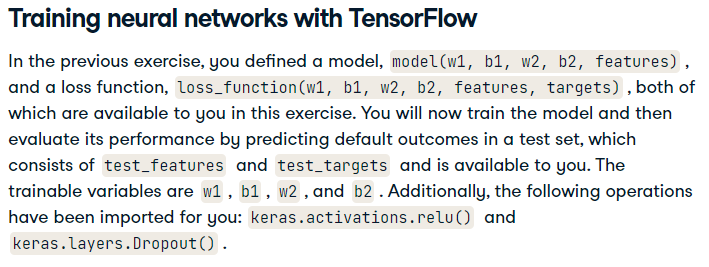

In [ ]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)